In [ ]:
# !pip install prophet

import pandas as pd
from prophet import Prophet
from sklearn.metricEvents import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("traffic.csv", parse_dates=["timestamp"])
df.head()

,id,timestamp,value
0,A,2025-03-01 00:00:00,201.67
1,A,2025-03-01 01:00:00,202.28
2,A,2025-03-01 02:00:00,203.42
3,A,2025-03-01 03:00:00,203.48
4,A,2025-03-01 04:00:00,206.96


In [ ]:
# --- Settings ---
forecast_horizon = 24  # predict next 24 hours
test_days = 2          # last 2 days = test
results = []

In [ ]:
for item_id in df["id"].unique():
    df_id = df[df["id"] == item_id].copy()
    df_id = df_id.sort_values("timestamp")
    df_id = df_id[["timestamp", "value"]].rename(columns={"timestamp": "ds", "value": "y"})

    split_point = -test_days * 24
    df_train = df_id.iloc[:split_point]
    df_test = df_id.iloc[split_point:]

    model = Prophet(daily_seasonality=True, weekly_seasonality=True)
    model.fit(df_train)

    future = model.make_future_dataframe(periods=len(df_test), freq="h")
    forecast = model.predict(future)

    # Align timestamps for evaluation
    forecast["ds"] = forecast["ds"].dt.floor("h")
    df_test["ds"] = df_test["ds"].dt.floor("h")

    merged = pd.merge(forecast[["ds", "yhat"]], df_test, on="ds")
    if not merged.empty:
        mae = mean_absolute_error(merged["y"], merged["yhat"])
        r2 = r2_score(merged["y"], merged["yhat"])
        results.append({"id": item_id, "mae": mae, "r2": r2})

    if item_id == "A":
        plt.figure(figsize=(14, 5))
        plt.plot(df_id["ds"], df_id["y"], label="True", alpha=0.6)
        plt.plot(forecast["ds"], forecast["yhat"], label="Forecast", linestyle="--")
        plt.title(f"Forecast vs True for ID '{item_id}'")
        plt.xlabel("Timestamp")
        plt.ylabel("Traffic")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

20:20:56 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/px/59s21xzx7b5gx1szbr4bgzsm0000gn/T/ipykernel_15324/2502126150.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ds"] = df_test["ds"].dt.floor("h")


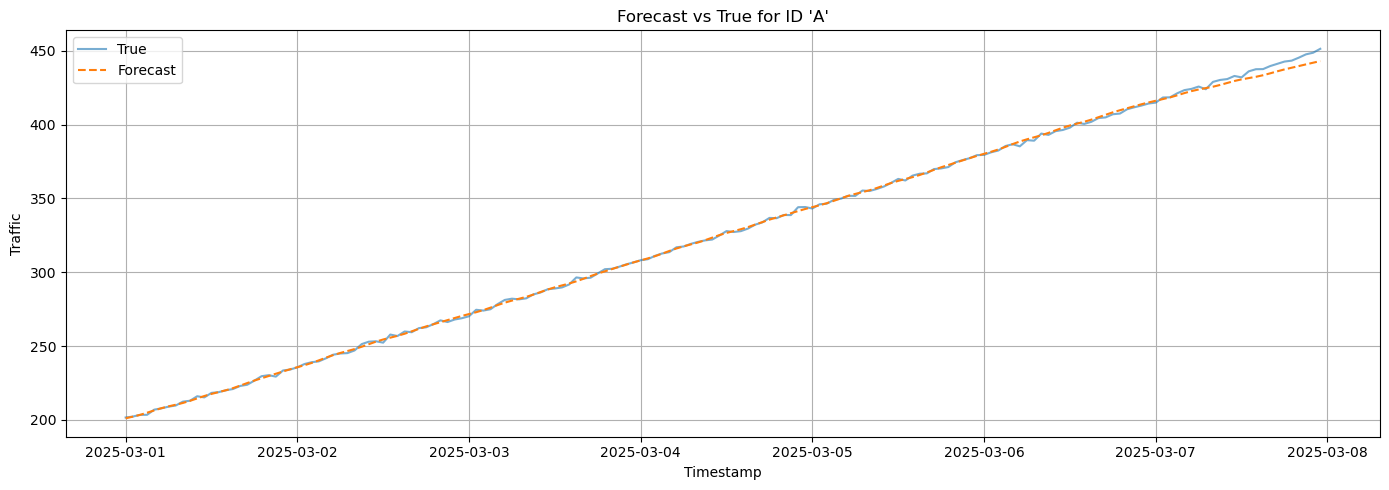

20:20:56 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/px/59s21xzx7b5gx1szbr4bgzsm0000gn/T/ipykernel_15324/2502126150.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ds"] = df_test["ds"].dt.floor("h")
20:20:56 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/px/59s21xzx7b5gx1szbr4bgzsm0000gn/T/ipykernel_15324/2502126150.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

  id           mae            r2
9  J  0.000000e+00      1.000000
3  D  2.153964e+00     -0.865588
0  A  2.348793e+00      0.977737
8  I  8.284888e+00    -97.396147
1  B  6.331478e+01      0.883851
6  G  6.373759e+01     -3.653465
5  F  6.601897e+01     -1.890395
2  C  1.230598e+02 -22415.386659
4  E  7.500569e+02    -28.370651
7  H  2.420344e+08     -0.403992


/var/folders/px/59s21xzx7b5gx1szbr4bgzsm0000gn/T/ipykernel_15324/2502126150.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ds"] = df_test["ds"].dt.floor("h")


In [5]:
results_df = pd.DataFrame(results)
print(results_df.sort_values("mae"))